In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1 ‐ Exploratory data analysis

In [2]:
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins_df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
logins_df["login_time"] = pd.to_datetime(logins_df["login_time"])
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
logins_df['count'] =1

In [6]:
logins_df.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [7]:
logins_df = logins_df.sort_values(by='login_time')
logins_df.head()

,login_time,count
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1


In [8]:
df_15m = logins_df.groupby(pd.Grouper(key='login_time', freq='15min')).agg('sum')
df_15m.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


## Logins per 15 minutes

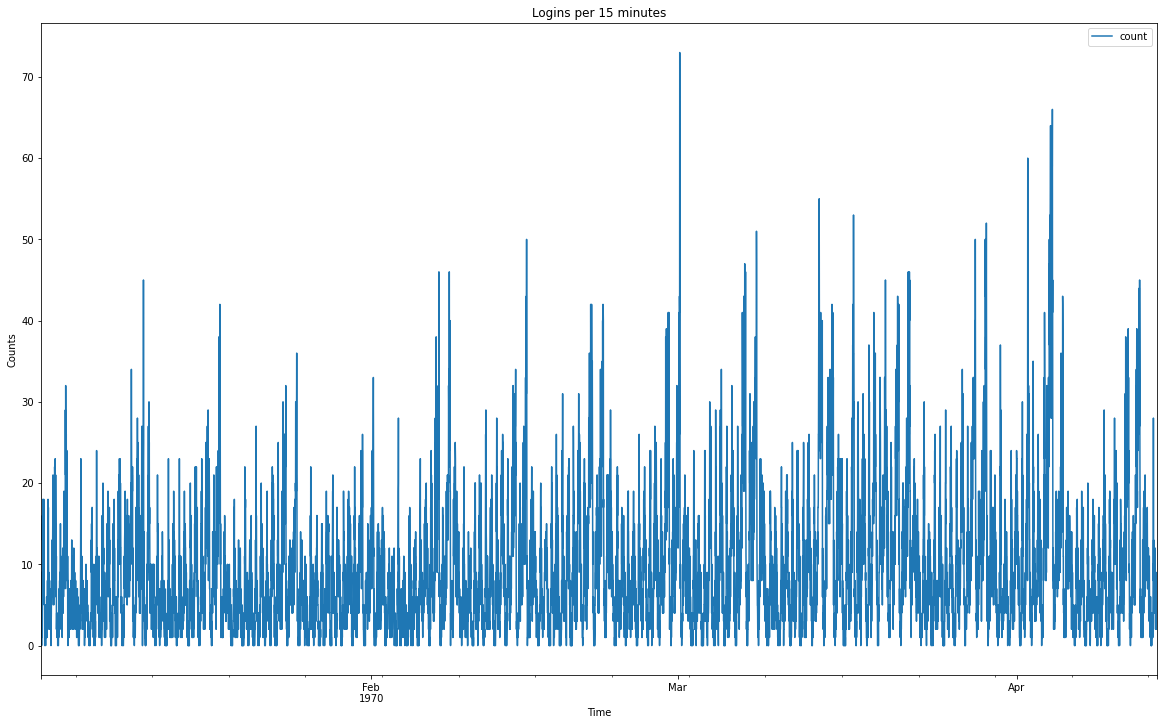

In [9]:
df_15m.plot(figsize=(20, 12))
plt.title('Logins per 15 minutes')
plt.xlabel('Time')
plt.ylabel('Counts')

plt.show()

In [10]:
df_1h = logins_df.groupby(pd.Grouper(key='login_time', freq='1h')).agg('sum')
df_1h.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [100]:
## Hourly logins

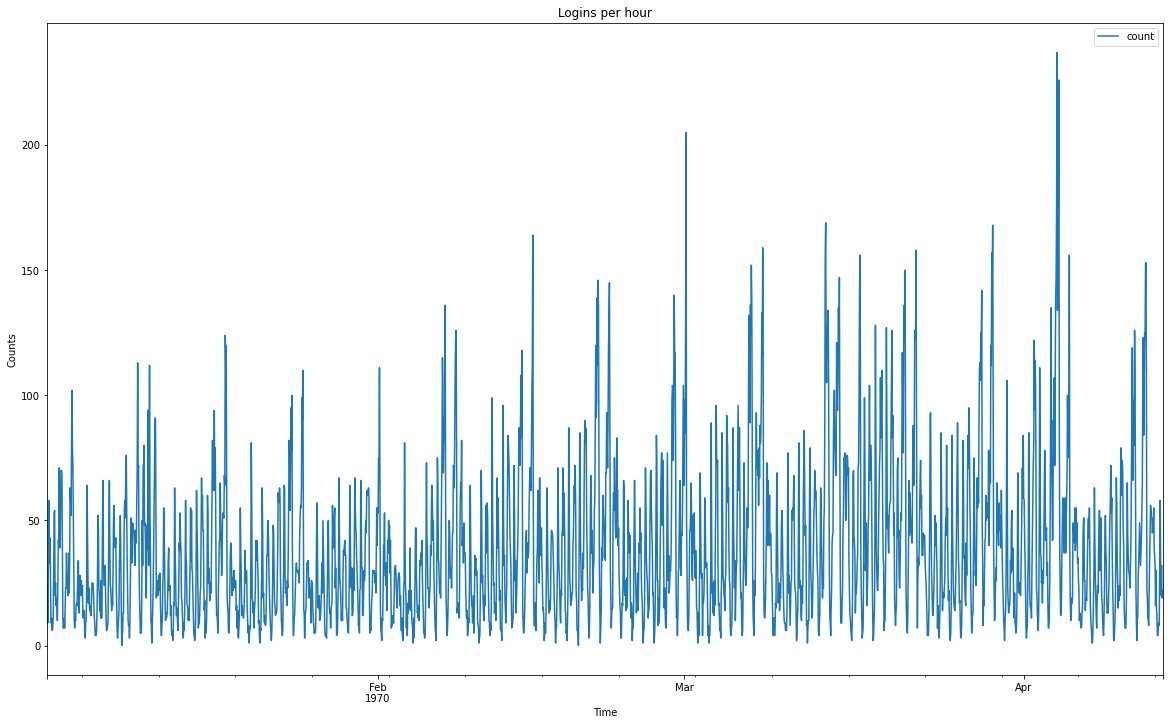

In [11]:
df_1h.plot(figsize=(20, 12))
plt.title('Logins per hour')
plt.xlabel('Time')
plt.ylabel('Counts')

plt.show()

In [12]:
df_1d = logins_df.groupby(pd.Grouper(key='login_time', freq='1d')).agg('sum')
df_1d.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


## Daily logins

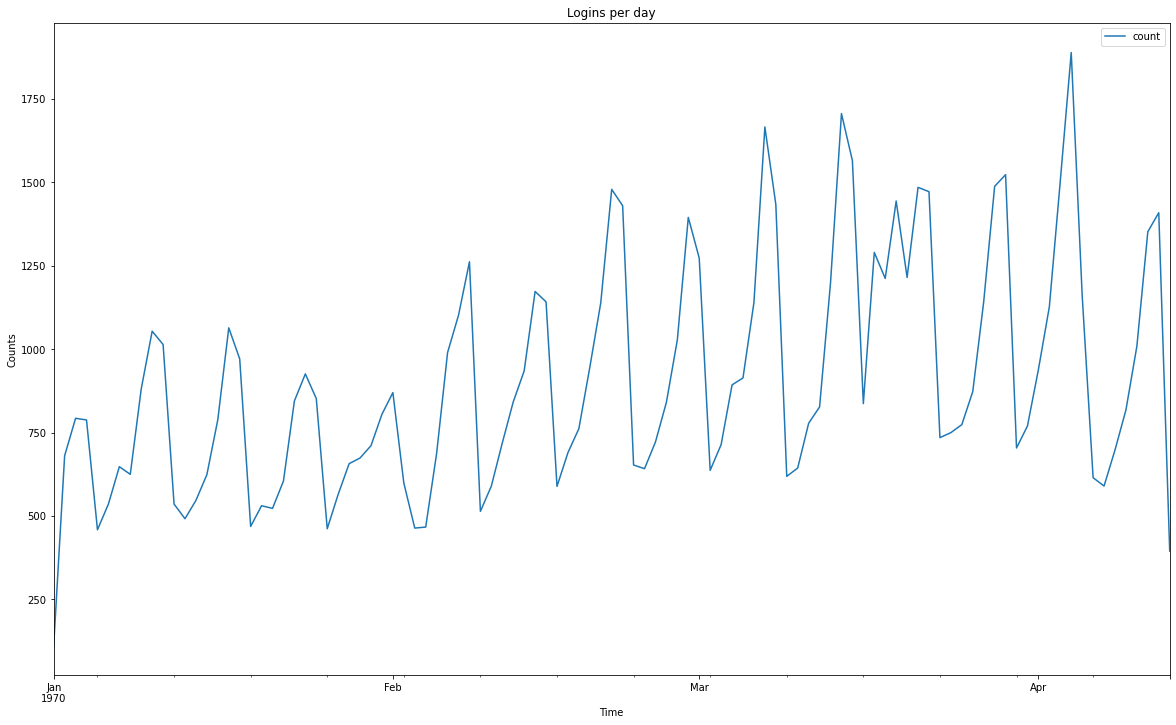

In [13]:
df_1d.plot(figsize=(20, 12))
plt.title('Logins per day')
plt.xlabel('Time')
plt.ylabel('Counts')

plt.show()

In [14]:
df_1w = logins_df.groupby(pd.Grouper(key='login_time', freq='1w')).agg('sum')
df_1w.head()

,count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744


# Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Answer: The percentage increase in toll bridge charges can be used as the key measure of success of this experiment. If the total toll charges per time period increase after reimbursement policy change, it indicates more intercity driving. 

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Answer: I would collect the data of the toll costs and the reimbursed costs, and date and times of transactions. I would anlalyze the data to find the percentage change in costs.

I would conduct a hypothesis test and check the significance. 

I would calculate the percentage toll cost change and the percentange of reimursements over costs and do a time series analysis. I would present the results of the hypothesis test to the 

If the statical test shows that the change in costs is significant then I would conclude that the introduction of the reimbursements was effecting in changing driving patterns




# Part 3 ‐ Predictive modeling

In [15]:
import json

In [16]:
with open('ultimate_data_challenge.json') as json_file:
    data = json.load(json_file)

In [17]:
df=pd.DataFrame(data)

In [18]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Label the data according to activity 

In [20]:
#convert column to datetime 
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [21]:
#Check the latest date
df = df.sort_values('last_trip_date', ascending = False)
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
4486,Winterfell,4,2014-01-25,5.0,1.00,2014-07-01,Android,0.0,True,25.0,11.94,5.0
43047,King's Landing,1,2014-01-15,5.0,1.01,2014-07-01,iPhone,0.8,True,89.3,5.49,4.7
24059,Astapor,1,2014-01-24,4.3,1.11,2014-07-01,iPhone,14.3,False,71.4,8.62,4.9
40290,King's Landing,2,2014-01-07,4.9,1.02,2014-07-01,iPhone,1.6,True,95.2,7.51,4.8
28689,King's Landing,5,2014-01-16,5.0,1.00,2014-07-01,iPhone,0.0,False,75.0,16.32,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23907,Winterfell,1,2014-01-01,5.0,3.00,2014-01-01,Android,100.0,False,100.0,3.36,5.0
47804,Astapor,1,2014-01-01,NaN,1.00,2014-01-01,Android,0.0,True,100.0,7.17,5.0
11578,Winterfell,1,2014-01-01,NaN,1.00,2014-01-01,Android,0.0,True,100.0,18.63,5.0
11573,Astapor,1,2014-01-01,NaN,1.25,2014-01-01,iPhone,100.0,False,100.0,2.47,5.0


In [22]:
#create column to show retained or not retained customer customers
df['active'] = 0

In [23]:
df.loc[df.last_trip_date > '2014-06-01', 'active'] = 1
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
4486,Winterfell,4,2014-01-25,5.0,1.00,2014-07-01,Android,0.0,True,25.0,11.94,5.0,1
43047,King's Landing,1,2014-01-15,5.0,1.01,2014-07-01,iPhone,0.8,True,89.3,5.49,4.7,1
24059,Astapor,1,2014-01-24,4.3,1.11,2014-07-01,iPhone,14.3,False,71.4,8.62,4.9,1
40290,King's Landing,2,2014-01-07,4.9,1.02,2014-07-01,iPhone,1.6,True,95.2,7.51,4.8,1
28689,King's Landing,5,2014-01-16,5.0,1.00,2014-07-01,iPhone,0.0,False,75.0,16.32,5.0,1


In [24]:
df.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
23907,Winterfell,1,2014-01-01,5.0,3.00,2014-01-01,Android,100.0,False,100.0,3.36,5.0,0
47804,Astapor,1,2014-01-01,NaN,1.00,2014-01-01,Android,0.0,True,100.0,7.17,5.0,0
11578,Winterfell,1,2014-01-01,NaN,1.00,2014-01-01,Android,0.0,True,100.0,18.63,5.0,0
11573,Astapor,1,2014-01-01,NaN,1.25,2014-01-01,iPhone,100.0,False,100.0,2.47,5.0,0
15359,Winterfell,1,2014-01-01,4.0,1.00,2014-01-01,iPhone,0.0,False,100.0,6.16,5.0,0


## Percentage of user retention

In [25]:
#check class proportions
df['active'].value_counts(normalize=True)

0    0.6338
1    0.3662
Name: active, dtype: float64

In [26]:
#convert column to datetime 
df['signup_date'] = pd.to_datetime(df['signup_date'])

### Encode Categorical columns

In [27]:
df['ultimate_black_user'].replace({True:1, False:0}, inplace=True)

In [28]:
#Check values in 'phone'
df['phone'].unique()

array(['Android', 'iPhone', None], dtype=object)

In [29]:
df['phone'].replace({'iPhone':1, 'Android':0, 'None':'NaN'}, inplace=True)

In [30]:
#Check values in 'city'
df['city'].unique()

array(['Winterfell', "King's Landing", 'Astapor'], dtype=object)

In [31]:
# One-hot encode 'city'
y = pd.get_dummies(df.city, prefix='city')

In [32]:
#merge datafames
df = df.join(y)

In [34]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell
4486,Winterfell,4,2014-01-25,5.0,1.00,2014-07-01,0.0,0.0,1,25.0,11.94,5.0,1,0,0,1
43047,King's Landing,1,2014-01-15,5.0,1.01,2014-07-01,1.0,0.8,1,89.3,5.49,4.7,1,0,1,0
24059,Astapor,1,2014-01-24,4.3,1.11,2014-07-01,1.0,14.3,0,71.4,8.62,4.9,1,1,0,0
40290,King's Landing,2,2014-01-07,4.9,1.02,2014-07-01,1.0,1.6,1,95.2,7.51,4.8,1,0,1,0
28689,King's Landing,5,2014-01-16,5.0,1.00,2014-07-01,1.0,0.0,0,75.0,16.32,5.0,1,0,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 4486 to 15359
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  float64       
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  int64         
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  int

In [38]:
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

In [39]:
df['phone'].fillna(df['phone'].value_counts().index[0], inplace=True)

In [40]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)

In [41]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell
4486,Winterfell,4,2014-01-25,5.0,1.00,2014-07-01,0.0,0.0,1,25.0,11.94,5.0,1,0,0,1
43047,King's Landing,1,2014-01-15,5.0,1.01,2014-07-01,1.0,0.8,1,89.3,5.49,4.7,1,0,1,0
24059,Astapor,1,2014-01-24,4.3,1.11,2014-07-01,1.0,14.3,0,71.4,8.62,4.9,1,1,0,0
40290,King's Landing,2,2014-01-07,4.9,1.02,2014-07-01,1.0,1.6,1,95.2,7.51,4.8,1,0,1,0
28689,King's Landing,5,2014-01-16,5.0,1.00,2014-07-01,1.0,0.0,0,75.0,16.32,5.0,1,0,1,0


In [ ]:
temp= df[df['active']==1]

<AxesSubplot:>

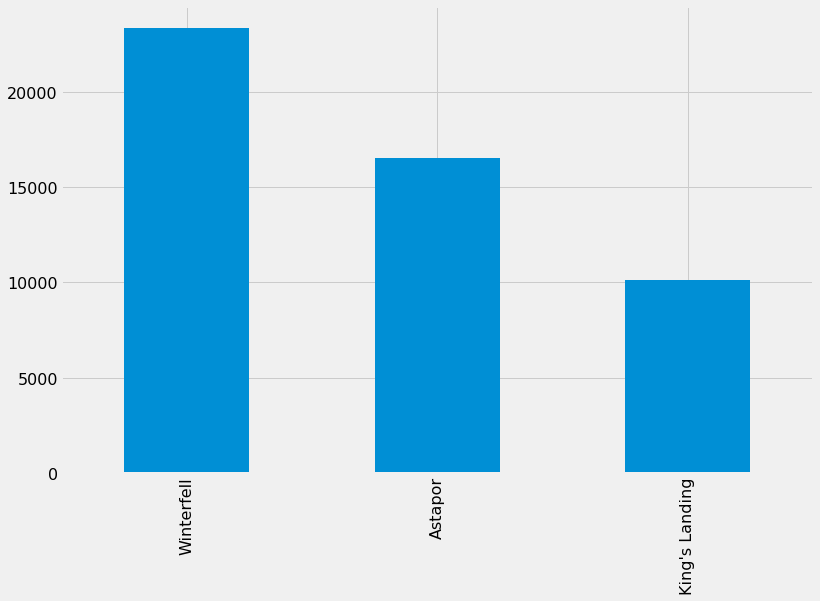

In [97]:
df['city'].value_counts().plot.bar()

<AxesSubplot:>

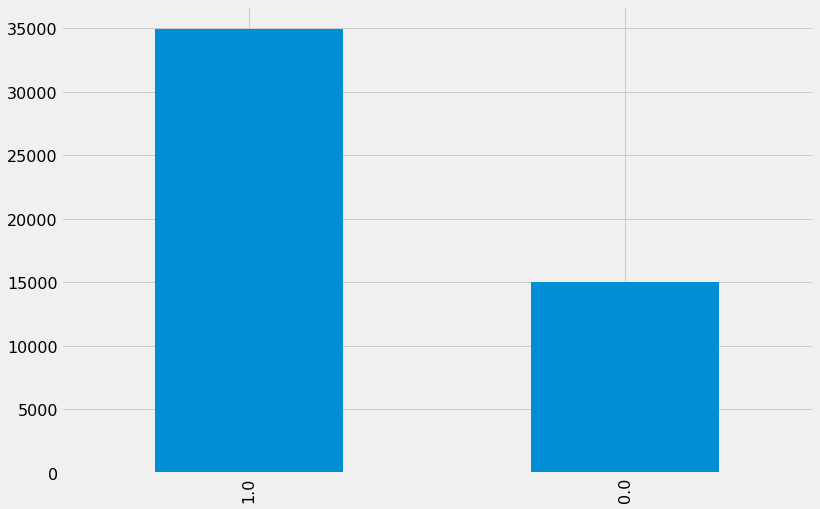

In [98]:
df['phone'].value_counts().plot.bar()

<AxesSubplot:>

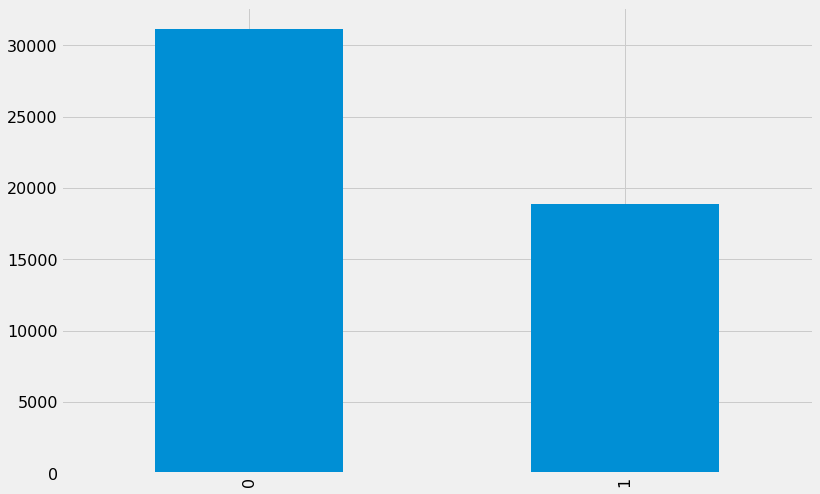

In [99]:
df['ultimate_black_user'].value_counts().plot.bar()

# Modeling

In [42]:
# Import Extreme Gradient Boosting Classification Model 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [43]:
# Create axes for labels and features
y = df['active']
X = df.drop(['city','signup_date','last_trip_date','active'], axis=1)

# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## XGB Model

In [44]:
#Since the we have a class imbalance, we have to account for that using 'scale_pos_weight'
#define classifier
xgbc = XGBClassifier(random_state= 42)
#define parameters
grid_params = {
    'scale_pos_weight':[1, 1.7, 2, 3],
    'n_estimators': [500],
    'max_depth': [3,4,5],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

xgb_grid_cv = GridSearchCV(estimator=xgbc, scoring='roc_auc', param_grid=grid_params, cv=3, n_jobs=-1, verbose=1)
#execute search
xgb_result = xgb_grid_cv.fit(X_train, y_train)

# summarize result
print(f"Best Score: {xgb_result.best_score_}")
print(f"Best Hyperparameters: {xgb_result.best_params_}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  6.9min finished


Best Score: 0.8601426373972089
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'scale_pos_weight': 1}


In [45]:
bst_model = xgb_result.best_estimator_

In [46]:
y_predx = bst_model.predict(X_test)

In [47]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_probx = bst_model.predict_proba(X_test)[:, 1]

In [48]:
print(classification_report(y_test, y_predx))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      9459
           1       0.75      0.67      0.71      5541

    accuracy                           0.80     15000
   macro avg       0.78      0.77      0.78     15000
weighted avg       0.79      0.80      0.79     15000



In [80]:
# ROC- AUC score
print(f'ROC-AUC score: {roc_auc_score(y_test,y_pred_probx):.4f}')
#Accuracy score
print(f'Accuracy score: {accuracy_score(y_test,y_predx):.4f}')

ROC-AUC score: 0.8579
Accuracy score: 0.7961


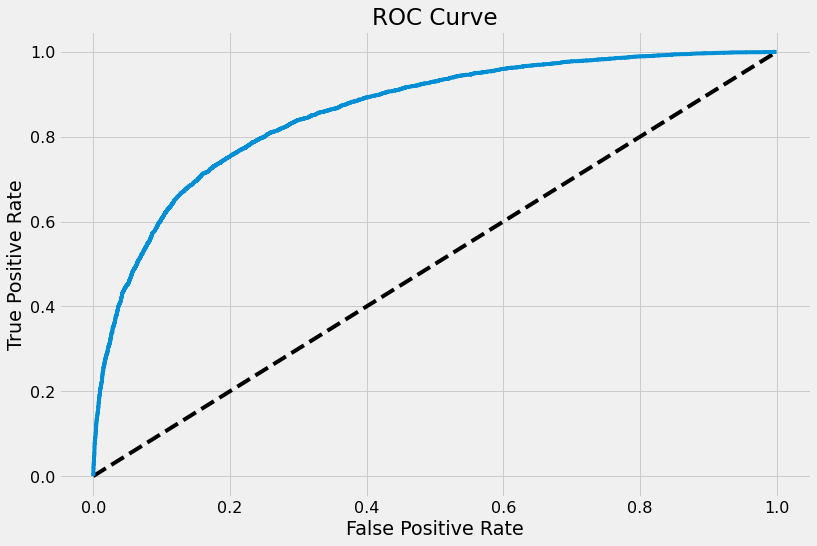

AUC: 0.8578539331564399


In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probx)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_probx)))

Text(0.5, 0, 'XGB Permutation Importance')

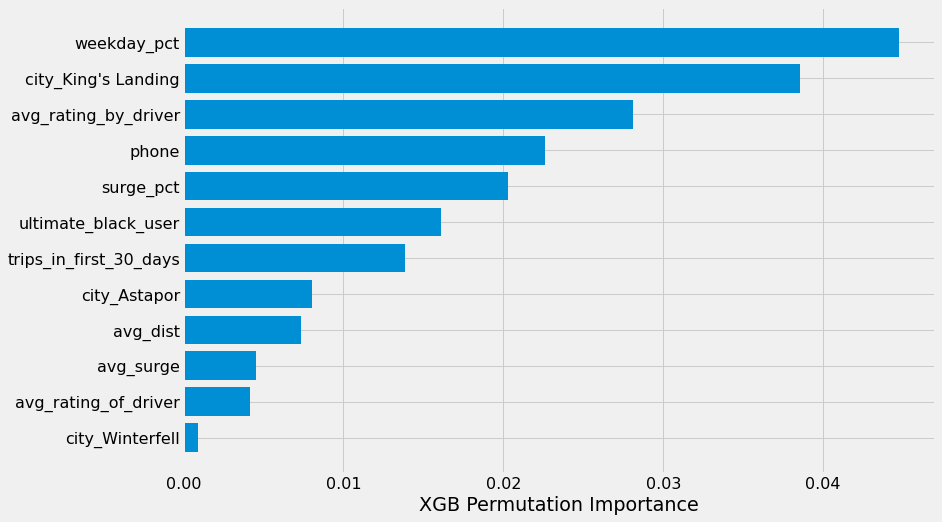

In [81]:
perm_importance = permutation_importance(bst_model, X_test, y_test)
feature_names =['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'city_Astapor', "city_King's Landing",
       'city_Winterfell']

features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("XGB Permutation Importance")

### KNN 

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [65]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)


In [67]:
from sklearn.model_selection import GridSearchCV
knn_params = {"knn__n_neighbors": range(1, 10)}
#knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn_pipe,knn_params,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             param_grid={'knn__n_neighbors': range(1, 10)})

In [68]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7470399999999999
Best Parameters: {'knn__n_neighbors': 8}


In [69]:
best_model = knn_cv.best_estimator_

In [70]:
y_pred = best_model.predict(X_test)

In [71]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

In [72]:
from sklearn.metrics import classification_report
# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred)
print(report)


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      9459
           1       0.79      0.63      0.70      5541

    accuracy                           0.80     15000
   macro avg       0.80      0.77      0.78     15000
weighted avg       0.80      0.80      0.80     15000



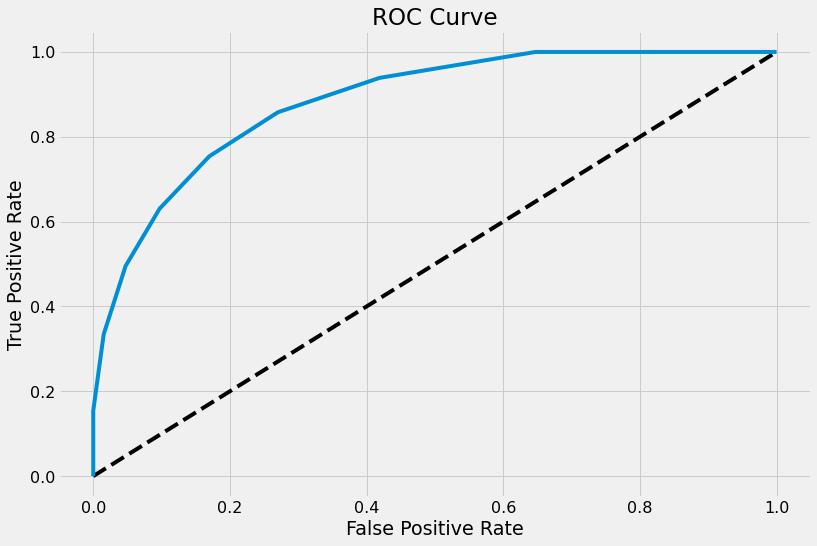

AUC: 0.8839603624483778


In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

In [76]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell'],
      dtype='object')

### Permutation iportance

In [78]:
from sklearn.inspection import permutation_importance

Text(0.5, 0, 'KNN Permutation Importance')

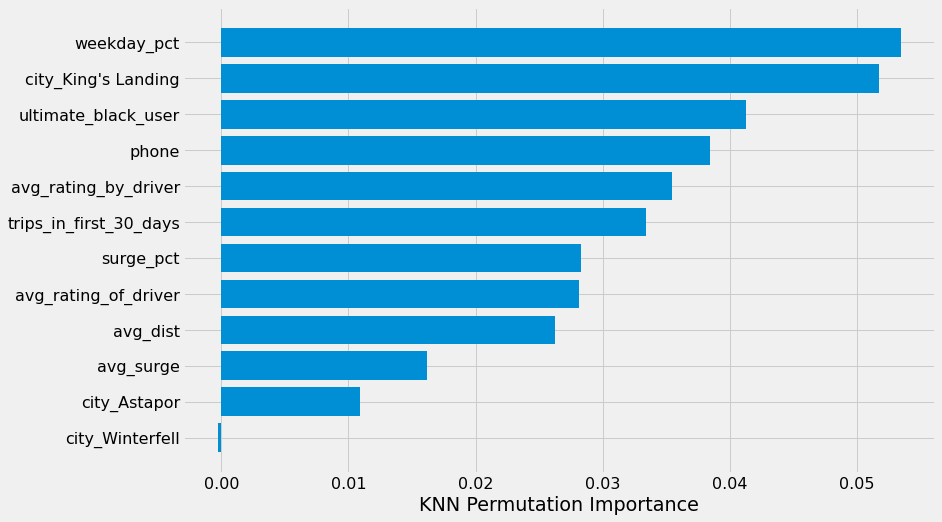

In [79]:
perm_importance = permutation_importance(best_model, X_test, y_test)
feature_names =['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'city_Astapor', "city_King's Landing",
       'city_Winterfell']

features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("KNN Permutation Importance")

I trained two different models and the the KNN model was the best model with ROC_AUC of 0.88. I picked this modelt to analyze the feature importance.

The Permutation feature importance shows that the two biggest predictor of churn are the percent of the user’s trips occurring during a weekday and whether a member lives in King's Landing.
I would suggest that the company does targeted marketing adviertisements that are directed at particular cities to improve retetion. They could also offer incentives for customers during periods of less ctivities such as promotional discounts. It also appears that being an ultimate black user is also an important indicator. The company could try to promote the usage of ultimate black to improve retention.